# **Stock Market Analysis**

In [ ]:
pip install Yahoo-ticker-downloader

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for Yahoo-ticker-downloader: filename=Yahoo_ticker_downloader-3.0.1-cp36-none-any.whl size=10184 sha256=9324d53eab93d7b386887b1a2f27b32c84bfd55ca7a68e31e9a8b11bc3ca4895
  Stored in directory: /root/.cache/pip/wheels/8f/8c/49/2f945a8ef86a6301584099c6a92ec9b40498e497517abb01a0
Successfully built Yahoo-ticker-downloader


In [ ]:
pip install yahoo-finance

     |████████████████████████████████| 133kB 5.2MB/s 
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-cp36-none-any.whl size=7234 sha256=40e26477bec620dc588ef0523d88423138e37538d960ddfb5ea2a76b7acfeae5
  Stored in directory: /root/.cache/pip/wheels/58/77/5b/66026e0fa7af2ee5926a516a70d3df95e17f952c570bc5aee6
Successfully built yahoo-finance


In [ ]:
from pandas_datareader import DataReader,wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.style as style
style.use('dark_background')
sns.set_style('whitegrid')

from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
#list of stocks used for analysis
stock_list = ['AAPL']

#inserting date
end_date = datetime.now()
start_date = datetime(2010, 1, 1)

#collecting data from web
for stock in stock_list:
  X = DataReader('AAPL','yahoo', start_date, end_date)

In [ ]:
#viewdata
X

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.593423
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.604822
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.499765
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.487749
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.530882
...,...,...,...,...,...,...
2021-01-25,145.089996,136.539993,143.070007,142.919998,157611700.0,142.919998
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,143.160004
2021-01-27,144.300003,140.410004,143.429993,142.059998,140843800.0,142.059998


In [ ]:
#description of the data
X.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2788.000000,2788.000000,2788.000000,2788.000000,2.788000e+03,2788.000000
mean,34.802235,34.078443,34.441346,34.453981,2.854676e+08,32.807731
std,26.167874,25.441059,25.810433,25.818686,2.285956e+08,26.312509
min,7.000000,6.794643,6.870357,6.858929,4.544800e+07,5.916859
25%,17.764732,17.390625,17.568304,17.553572,1.203958e+08,15.491585
50%,27.331250,26.832500,27.143750,27.117500,2.015364e+08,25.139590
75%,43.613126,42.915624,43.209375,43.206876,3.876110e+08,41.853470
max,145.089996,141.369995,143.600006,143.160004,1.880998e+09,143.160004


In [ ]:
#information from the data
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2788 entries, 2010-01-04 to 2021-01-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2788 non-null   float64
 1   Low        2788 non-null   float64
 2   Open       2788 non-null   float64
 3   Close      2788 non-null   float64
 4   Volume     2788 non-null   float64
 5   Adj Close  2788 non-null   float64
dtypes: float64(6)
memory usage: 152.5 KB


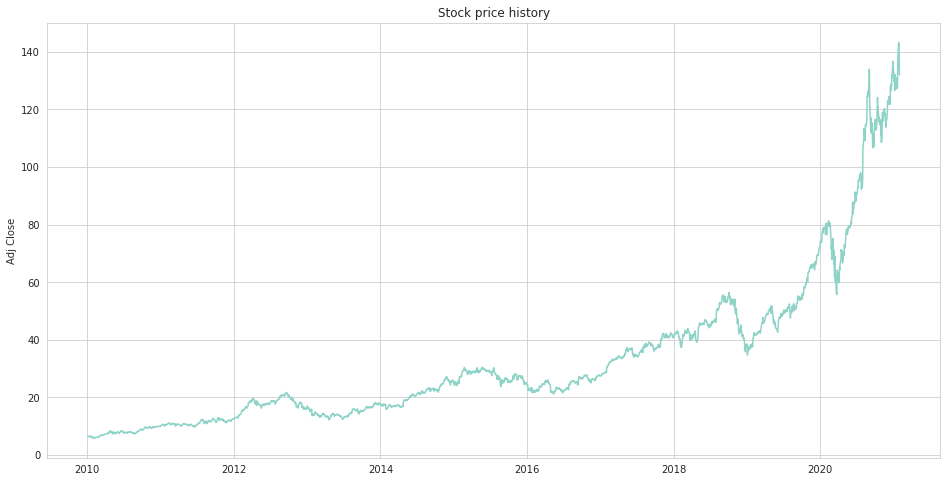

In [ ]:
#ploting the data of stock exchange
plt.figure(figsize=(16, 8))
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title('Stock price history')
plt.plot(X['Adj Close'])
plt.show()

In [ ]:
#create new dataframe with 'adj close column
data= X.filter(['Adj Close'])
#convert dataframe to numpy array
dataset = data.values
#creating the training data
trainData = math.ceil(len(dataset) * .8)

trainData

2231

In [ ]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00492968],
       [0.00501273],
       [0.00424725],
       ...,
       [0.99198498],
       [0.95577187],
       [0.91839303]])

In [ ]:
  #create training dataset
#create scaled training dataset
trained_data = scaled_data[0:trainData, :]


#split the data with xtrain and ytrain
x_train = [] #independent 
y_train = [] #dependent (target)

for i in range(60, len(trained_data)):
  x_train.append(trained_data[i-60:i, 0])
  y_train.append(trained_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)

IndentationError: ignored

In [ ]:
#convert training dataset into numpy array
x_train, y_train =np.array(x_train),np.array(y_train)
x_train.shape

(2160, 60)

In [ ]:
#reshape the data as numpy model will expect 3-d data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2160, 60, 1)

In [ ]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#traindata
model.fit(x_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
135/135 [==============================] - 7s 30ms/step - loss: 0.0035
Epoch 2/10
135/135 [==============================] - 4s 30ms/step - loss: 4.7590e-05
Epoch 3/10
135/135 [==============================] - 4s 30ms/step - loss: 4.8322e-05
Epoch 4/10
135/135 [==============================] - 4s 31ms/step - loss: 4.2969e-05
Epoch 5/10
135/135 [==============================] - 4s 30ms/step - loss: 4.6308e-05
Epoch 6/10
135/135 [==============================] - 4s 31ms/step - loss: 4.0010e-05
Epoch 7/10
135/135 [==============================] - 4s 31ms/step - loss: 4.5645e-05
Epoch 8/10
135/135 [==============================] - 4s 31ms/step - loss: 4.1421e-05
Epoch 9/10
135/135 [==============================] - 4s 31ms/step - loss: 3.0471e-05
Epoch 10/10
135/135 [==============================] - 4s 32ms/step - loss: 3.1702e-05


In [ ]:
#create the testing data
#creating array with scaled values from 2168 to 2218
test_data = scaled_data[trainData - 60: , :]
#create test dataset
x_test = []
y_test = dataset[trainData:, :] #values to be predicted
for i in range (60,len(test_data)):
  x_test.append(test_data[i-60:i, 0]) #last 50 values


In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshaping the data for LSTM with 3-d data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(555, 60, 1)

In [ ]:
#predict the values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#RMSE (to see how model performs)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.02137568018457911

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

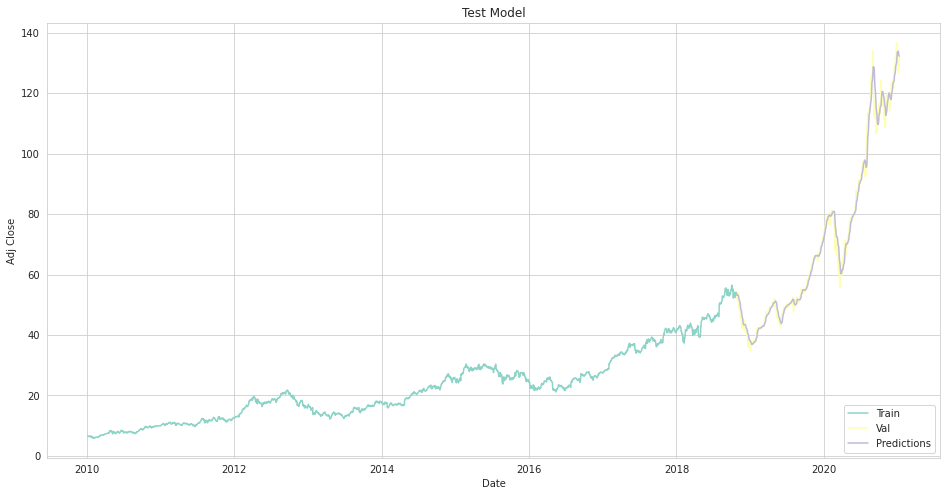

In [ ]:
#plot the data
train = data[:trainData]
valid = data[trainData:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Test Model')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show

In [ ]:
#show actual and predicted prices
valid

,Adj Close,Predictions
Date,,
2018-10-26,52.634758,53.648685
2018-10-29,51.646793,53.567516
2018-10-30,51.904736,53.376755
2018-10-31,53.257713,53.160324
2018-11-01,54.075333,53.067520
...,...,...
2021-01-05,131.009995,133.901886
2021-01-06,126.599998,133.740448
2021-01-07,130.919998,133.036285


In [ ]:
#getting the quote (actual prediction)
apple = DataReader('AAPL', 'yahoo', start = '2010-01-01', end = '2021-01-11')
#new dataframe
new_trainData = apple.filter (['Adj Close'])
#get the data history
last_50_days = new_trainData[-60:].values
#scaleing data
last_50_days_scaled = scaler.transform(last_50_days)
#empty list
X_test = []
X_test.append(last_50_days_scaled)
#converting to numpy array
X_test = np.array(X_test)
#reshaping
X_test =np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#model predict
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[131.79543]]
